In [1]:
from typing import List
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (19,9)

In [2]:
quarters = [ (120, 40, 28, 24), (45, 35, 36, 23), (27, 14, 7, 3)]
# month_name = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

In [3]:
def accounts_per_week(accounts: int, years: List):
    divided = accounts / (3*52) # weekly for 3 years    
    monthly_percentage = []
    for quarters in years:
        for quarter in quarters:
            each_month = (quarter / 3) / 100            
            monthly_percentage.append([each_month, each_month, each_month])
            
    flat_list = [i for sublist in monthly_percentage for i in sublist]
    
    months = []
    for i in enumerate(flat_list):
        months.append(f"month_{ i[0] + 1}")
        
    dict_from_list = dict(zip(months, flat_list))
    return dict_from_list

In [4]:
aa = accounts_per_week(5000, quarters)

In [5]:
aa

{'month_1': 0.4,
 'month_2': 0.4,
 'month_3': 0.4,
 'month_4': 0.13333333333333333,
 'month_5': 0.13333333333333333,
 'month_6': 0.13333333333333333,
 'month_7': 0.09333333333333334,
 'month_8': 0.09333333333333334,
 'month_9': 0.09333333333333334,
 'month_10': 0.08,
 'month_11': 0.08,
 'month_12': 0.08,
 'month_13': 0.15,
 'month_14': 0.15,
 'month_15': 0.15,
 'month_16': 0.11666666666666665,
 'month_17': 0.11666666666666665,
 'month_18': 0.11666666666666665,
 'month_19': 0.12,
 'month_20': 0.12,
 'month_21': 0.12,
 'month_22': 0.07666666666666667,
 'month_23': 0.07666666666666667,
 'month_24': 0.07666666666666667,
 'month_25': 0.09,
 'month_26': 0.09,
 'month_27': 0.09,
 'month_28': 0.04666666666666667,
 'month_29': 0.04666666666666667,
 'month_30': 0.04666666666666667,
 'month_31': 0.023333333333333334,
 'month_32': 0.023333333333333334,
 'month_33': 0.023333333333333334,
 'month_34': 0.01,
 'month_35': 0.01,
 'month_36': 0.01}

In [6]:
list(aa.items())[:5]

[('month_1', 0.4),
 ('month_2', 0.4),
 ('month_3', 0.4),
 ('month_4', 0.13333333333333333),
 ('month_5', 0.13333333333333333)]

In [7]:
dataframe = pd.DataFrame(aa.items(), columns=['Month', 'MonthlyGrowth'])
dataframe["TotalUsers"] = 0
dataframe["NewUsers"] = 0

In [8]:
for i, val in enumerate(dataframe["TotalUsers"]):
    if i == 0:
        dataframe.iat[i, 2] = 45
        dataframe.iat[i, 3] = 45
    
    else:
        dataframe.iat[i,2] = int(dataframe.iloc[i-1][2] * dataframe.iloc[i-1][1] + dataframe.iloc[i-1][2])
        dataframe.iat[i,3] = int(dataframe.iloc[i][2] - dataframe.iloc[i-1][2])

In [9]:
dataframe.head(15)

,Month,MonthlyGrowth,TotalUsers,NewUsers
0,month_1,0.400000,45,45
1,month_2,0.400000,63,18
2,month_3,0.400000,88,25
3,month_4,0.133333,123,35
4,month_5,0.133333,139,16
5,month_6,0.133333,157,18
6,month_7,0.093333,177,20
7,month_8,0.093333,193,16
8,month_9,0.093333,211,18
9,month_10,0.080000,230,19


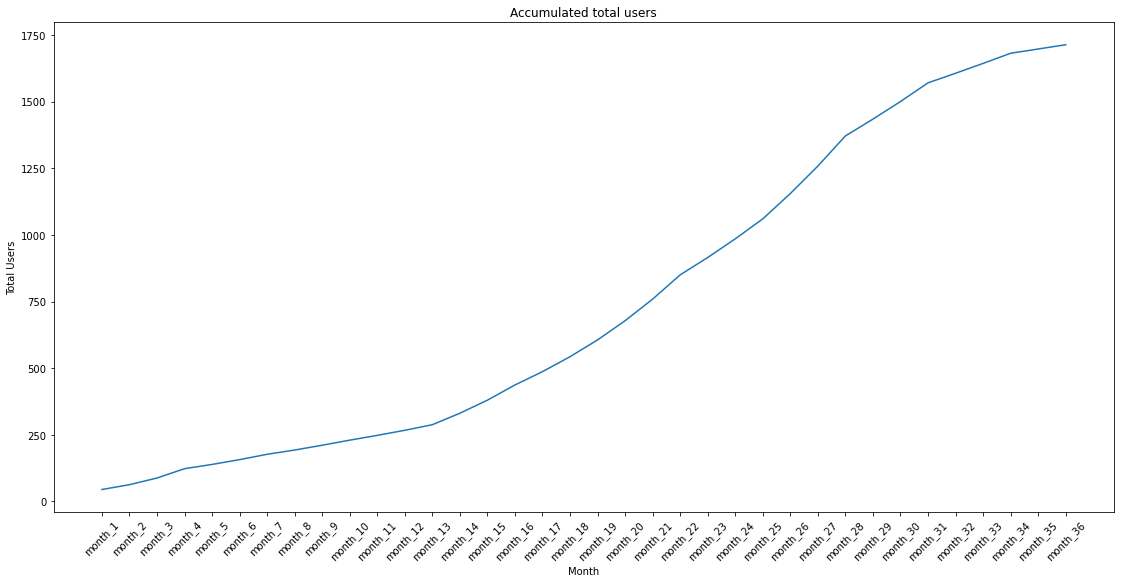

In [10]:
plt.plot(dataframe["Month"], dataframe["TotalUsers"])
plt.title('Accumulated total users')
plt.xlabel('Month')
plt.xticks(rotation = 45)
plt.ylabel('Total Users')
plt.show()

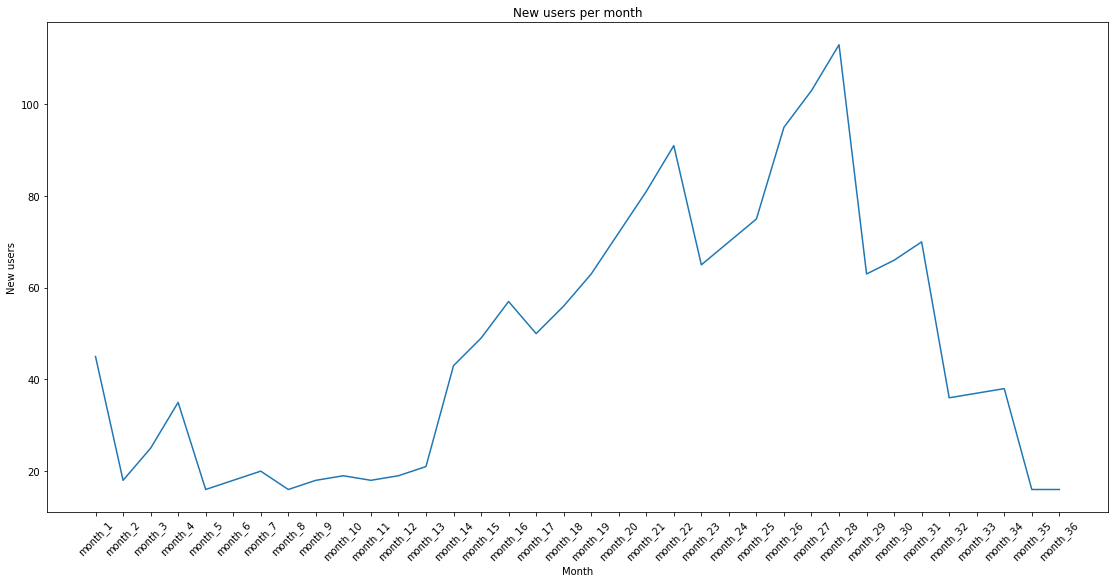

In [11]:
plt.plot(dataframe["Month"], dataframe["NewUsers"])
plt.title('New users per month')
plt.xlabel('Month')
plt.xticks(rotation = 45)
plt.ylabel('New users')
plt.show()

- Subdivide each month into 4 weeks and add some noise to each value. Normal distribution
- New users per week column -> 36 * 4
- Generate user_id for each user <- First list of users
- Start in July 2018
- Account activation date <- real date, monday - friday
- Add churn

In [12]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [13]:
start = datetime(2018, 7, 1)

In [14]:
start

datetime.datetime(2018, 7, 1, 0, 0)

In [15]:
one_more_month = relativedelta(months=1)

In [16]:
next_month = start + one_more_month

In [17]:
next_month

datetime.datetime(2018, 8, 1, 0, 0)

In [18]:
months = dataframe["Month"]
dates = []
start = datetime(2018, 7, 1)

for i, val in enumerate(months):
    if i == 0:
        dates.append(start)
    
    else:
        new_month = dates[i-1] + one_more_month
        dates.append(new_month)

dataframe["Date"] = dates

In [19]:
dataframe[0:15]

,Month,MonthlyGrowth,TotalUsers,NewUsers,Date
0,month_1,0.400000,45,45,2018-07-01
1,month_2,0.400000,63,18,2018-08-01
2,month_3,0.400000,88,25,2018-09-01
3,month_4,0.133333,123,35,2018-10-01
4,month_5,0.133333,139,16,2018-11-01
5,month_6,0.133333,157,18,2018-12-01
6,month_7,0.093333,177,20,2019-01-01
7,month_8,0.093333,193,16,2019-02-01
8,month_9,0.093333,211,18,2019-03-01
9,month_10,0.080000,230,19,2019-04-01


In [20]:
print(pd.bdate_range(start=dataframe["Date"][0], end=dataframe["Date"][1], inclusive="left"))

DatetimeIndex(['2018-07-02', '2018-07-03', '2018-07-04', '2018-07-05',
               '2018-07-06', '2018-07-09', '2018-07-10', '2018-07-11',
               '2018-07-12', '2018-07-13', '2018-07-16', '2018-07-17',
               '2018-07-18', '2018-07-19', '2018-07-20', '2018-07-23',
               '2018-07-24', '2018-07-25', '2018-07-26', '2018-07-27',
               '2018-07-30', '2018-07-31'],
              dtype='datetime64[ns]', freq='B')


In [21]:
print(pd.bdate_range(start=dataframe["Date"][1], end=dataframe["Date"][2], inclusive="left"))

DatetimeIndex(['2018-08-01', '2018-08-02', '2018-08-03', '2018-08-06',
               '2018-08-07', '2018-08-08', '2018-08-09', '2018-08-10',
               '2018-08-13', '2018-08-14', '2018-08-15', '2018-08-16',
               '2018-08-17', '2018-08-20', '2018-08-21', '2018-08-22',
               '2018-08-23', '2018-08-24', '2018-08-27', '2018-08-28',
               '2018-08-29', '2018-08-30', '2018-08-31'],
              dtype='datetime64[ns]', freq='B')


In [22]:
len(pd.bdate_range(start=dataframe["Date"][0], end=dataframe["Date"][1], inclusive="left"))

22

In [23]:
dataframe["Date"][1].year, dataframe["Date"][1].month

(2018, 8)

In [24]:
dataframe["NewUsers"][0] / len(pd.bdate_range(start=dataframe["Date"][0], end=dataframe["Date"][1], inclusive="left"))

2.0454545454545454

In [25]:
dataframe.head(10)

,Month,MonthlyGrowth,TotalUsers,NewUsers,Date
0,month_1,0.400000,45,45,2018-07-01
1,month_2,0.400000,63,18,2018-08-01
2,month_3,0.400000,88,25,2018-09-01
3,month_4,0.133333,123,35,2018-10-01
4,month_5,0.133333,139,16,2018-11-01
5,month_6,0.133333,157,18,2018-12-01
6,month_7,0.093333,177,20,2019-01-01
7,month_8,0.093333,193,16,2019-02-01
8,month_9,0.093333,211,18,2019-03-01
9,month_10,0.080000,230,19,2019-04-01


In [26]:
dataframe["NewUsers"][0]

45

In [27]:
import numpy as np

In [28]:
bb = np.random.normal(
            dataframe["NewUsers"][0] / len(pd.bdate_range(start=dataframe["Date"][0], end=dataframe["Date"][0 + 1], inclusive="left")), 0.8,
            len(pd.bdate_range(start=dataframe["Date"][0], end=dataframe["Date"][0 + 1], inclusive="left")))
bb

array([2.94791452, 2.92869015, 1.01589889, 2.63287276, 2.68060863,
       1.4235497 , 3.23162362, 1.02170853, 2.18028177, 2.43589412,
       2.80051155, 2.34489954, 2.23680469, 1.68298982, 1.71277406,
       1.16592121, 2.17310377, 2.47444623, 1.07025847, 2.72571485,
       1.94637608, 3.30326949])

In [29]:
sum(bb)

48.136112449236

In [30]:
def new_users_per_day():
    full = []
    for i in range(len(dataframe["NewUsers"])):
        if i <= 34:
            s = list(np.random.normal(
                dataframe["NewUsers"][i] / len(pd.bdate_range(start=dataframe["Date"][i], end=dataframe["Date"][i + 1], inclusive="left")), 1,
                len(pd.bdate_range(start=dataframe["Date"][i], end=dataframe["Date"][i + 1], inclusive="left"))))
        elif i == 35:
            s = list(np.random.normal(dataframe["NewUsers"][i] / len(pd.bdate_range(start=dataframe["Date"][i], end=dataframe["Date"][i] + pd.tseries.offsets.MonthEnd(1))), 1, 
                          len(pd.bdate_range(start=dataframe["Date"][i], end=dataframe["Date"][i] + pd.tseries.offsets.MonthEnd(1)))))
        full.append(s)
        flat_full = [i for sublist in full for i in sublist]
        rounded = [round(i) for i in flat_full]
        
        for i in range(len(rounded)):
            if rounded[i] < 0:
                rounded[i] = 0
    return rounded

In [31]:
aa = new_users_per_day()

In [32]:
len(aa)

783

In [33]:
dataframe["Date"][-1:]

35   2021-06-01
Name: Date, dtype: datetime64[ns]

In [34]:
def daily_new_clients(date):
    days = []
    for i in range(len(date)):
        if i <= 34:
            days.append(list(pd.bdate_range(start=date[i], end=date[i+1], inclusive="left")))
        else:
            days.append(list(pd.bdate_range(start=date[i], end=dataframe["Date"][35] + pd.tseries.offsets.MonthEnd(1))))
            
    flat_list = [i for sublist in days for i in sublist]
    return flat_list
        
    

In [35]:
test = daily_new_clients(dataframe["Date"])

In [36]:
test[:10]

[Timestamp('2018-07-02 00:00:00', freq='B'),
 Timestamp('2018-07-03 00:00:00', freq='B'),
 Timestamp('2018-07-04 00:00:00', freq='B'),
 Timestamp('2018-07-05 00:00:00', freq='B'),
 Timestamp('2018-07-06 00:00:00', freq='B'),
 Timestamp('2018-07-09 00:00:00', freq='B'),
 Timestamp('2018-07-10 00:00:00', freq='B'),
 Timestamp('2018-07-11 00:00:00', freq='B'),
 Timestamp('2018-07-12 00:00:00', freq='B'),
 Timestamp('2018-07-13 00:00:00', freq='B')]

In [37]:
dataset = pd.DataFrame(data = {"Date": test})

In [38]:
dataset["NewDailyCustomer"] = aa

In [39]:
dataset[200:220]

,Date,NewDailyCustomer
200,2019-04-08,0
201,2019-04-09,1
202,2019-04-10,2
203,2019-04-11,1
204,2019-04-12,0
205,2019-04-15,0
206,2019-04-16,1
207,2019-04-17,1
208,2019-04-18,0
209,2019-04-19,1


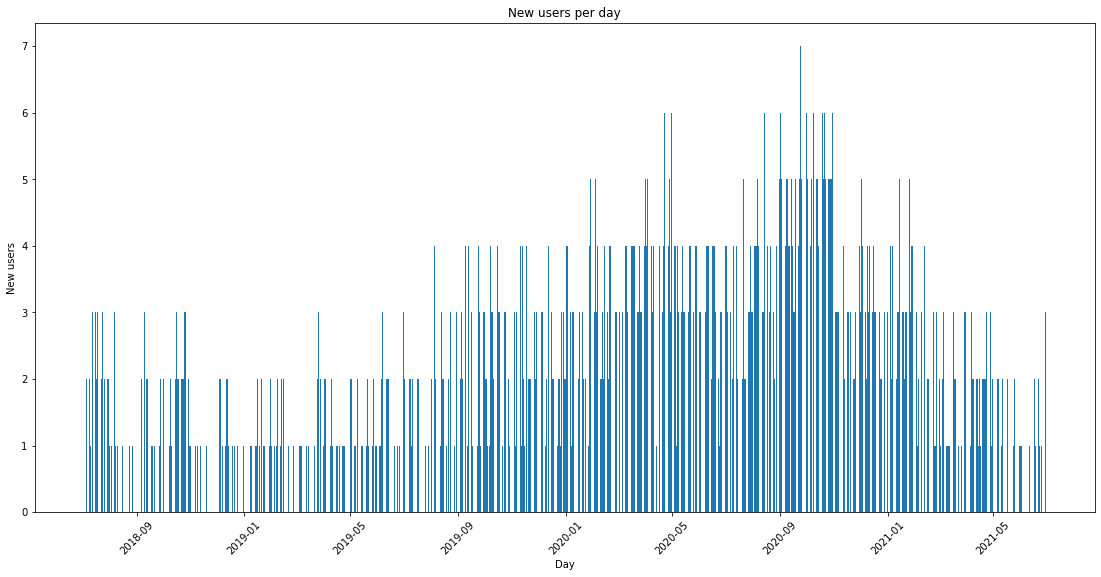

In [40]:
plt.bar(dataset["Date"], dataset["NewDailyCustomer"])
plt.title('New users per day')
plt.xlabel('Day')
plt.xticks(rotation = 45)
plt.ylabel('New users')
plt.show()

In [41]:
dataset.head(10)

,Date,NewDailyCustomer
0,2018-07-02,1
1,2018-07-03,3
2,2018-07-04,2
3,2018-07-05,0
4,2018-07-06,2
5,2018-07-09,2
6,2018-07-10,1
7,2018-07-11,0
8,2018-07-12,0
9,2018-07-13,3


In [42]:
dataset["Date"][10].strftime('%d/%m/%Y')

'16/07/2018'

In [43]:
dates = []
for i in dataset["Date"]:
    dates.append(i.strftime('%d/%m/%Y'))

In [44]:
users = dataset["NewDailyCustomer"].to_list()

In [45]:
type(dates), type(users)

(list, list)

In [46]:
dict_from_lists = dict(zip(dates, users))

In [47]:
sum(dataset["NewDailyCustomer"])

1706

In [48]:
list_users = []
for i in range(sum(dataset["NewDailyCustomer"])):
    list_users.append("user_" + str(i))

In [49]:
len(list_users)

1706

In [50]:
users[20:30]

[2, 2, 1, 0, 1, 1, 3, 1, 0, 1]

In [51]:
list_users[20:30]

['user_20',
 'user_21',
 'user_22',
 'user_23',
 'user_24',
 'user_25',
 'user_26',
 'user_27',
 'user_28',
 'user_29']

In [52]:
new_list = []
for i in users:
    new_list.append(list_users[:i])
    del list_users[:i] # Super important, othervise the names reset to person_1, at each date

In [53]:
new_list[20:30]

[['user_34', 'user_35'],
 ['user_36', 'user_37'],
 ['user_38'],
 [],
 ['user_39'],
 ['user_40'],
 ['user_41', 'user_42', 'user_43'],
 ['user_44'],
 [],
 ['user_45']]

In [54]:
final_dict= {}
for i, (a, b, c) in enumerate(zip(dates, users, new_list)):
    final_dict[i] = (a, b, c)

In [55]:
list(final_dict.items())[20:30]

[(20, ('30/07/2018', 2, ['user_34', 'user_35'])),
 (21, ('31/07/2018', 2, ['user_36', 'user_37'])),
 (22, ('01/08/2018', 1, ['user_38'])),
 (23, ('02/08/2018', 0, [])),
 (24, ('03/08/2018', 1, ['user_39'])),
 (25, ('06/08/2018', 1, ['user_40'])),
 (26, ('07/08/2018', 3, ['user_41', 'user_42', 'user_43'])),
 (27, ('08/08/2018', 1, ['user_44'])),
 (28, ('09/08/2018', 0, [])),
 (29, ('10/08/2018', 1, ['user_45']))]

In [56]:
keys = []
values = []

In [57]:
for key, value in final_dict.items():
        for item in value[2]:
            keys.append(item)
            values.append(value[0])
final_final_dict = dict(zip(keys, values))

In [58]:
list(final_final_dict.items())[20:50]

[('user_20', '18/07/2018'),
 ('user_21', '18/07/2018'),
 ('user_22', '19/07/2018'),
 ('user_23', '20/07/2018'),
 ('user_24', '20/07/2018'),
 ('user_25', '23/07/2018'),
 ('user_26', '23/07/2018'),
 ('user_27', '24/07/2018'),
 ('user_28', '24/07/2018'),
 ('user_29', '24/07/2018'),
 ('user_30', '26/07/2018'),
 ('user_31', '26/07/2018'),
 ('user_32', '27/07/2018'),
 ('user_33', '27/07/2018'),
 ('user_34', '30/07/2018'),
 ('user_35', '30/07/2018'),
 ('user_36', '31/07/2018'),
 ('user_37', '31/07/2018'),
 ('user_38', '01/08/2018'),
 ('user_39', '03/08/2018'),
 ('user_40', '06/08/2018'),
 ('user_41', '07/08/2018'),
 ('user_42', '07/08/2018'),
 ('user_43', '07/08/2018'),
 ('user_44', '08/08/2018'),
 ('user_45', '10/08/2018'),
 ('user_46', '15/08/2018'),
 ('user_47', '16/08/2018'),
 ('user_48', '21/08/2018'),
 ('user_49', '23/08/2018')]

In [59]:
len(list(final_final_dict.items()))

1706

---

In [60]:
def give_first_name(dictionary):
    """
    For each item,
    Give value of M/F to each following 0.7, 0.3
    If M or F, then given M or F name following
    name prob
    """
    m_f = [1, 2]
    m_f_probs = [0.6, 0.4]
    
    m_names = ["Fred", "Mickael", "Philippe"]
    f_names = ["Claire", "Manon", "Sarah"]
    
    first_name = []
    for i in dictionary:
        user_m_f = np.random.choice(m_f, p = m_f_probs)
        if user_m_f == 1:
            first_name.append(np.random.choice(m_names))
        else:
            first_name.append(np.random.choice(f_names))
    return first_name

In [61]:
m_names = ["Fred", "Mickael", "Philippe"]
f_names = ["Claire", "Manon", "Sarah"]

In [62]:
m_f = ["M", "F"]
m_f_probs = [0.6, 0.4]

In [63]:
np.random.choice(m_f, p = m_f_probs)

'F'

In [64]:
teeest = ["a", "b", "c", "d", "e"]

In [65]:
for i, val in enumerate(teeest):
    print(i)

0
1
2
3
4


In [66]:
for i in enumerate(teeest):
    print(i)

(0, 'a')
(1, 'b')
(2, 'c')
(3, 'd')
(4, 'e')


In [67]:
for i in teeest:
    print(i)

a
b
c
d
e


In [68]:
list_of_names = give_first_name(final_final_dict)

In [69]:
list_of_names[:20]

['Mickael',
 'Philippe',
 'Mickael',
 'Manon',
 'Sarah',
 'Mickael',
 'Manon',
 'Philippe',
 'Philippe',
 'Manon',
 'Manon',
 'Fred',
 'Philippe',
 'Fred',
 'Mickael',
 'Fred',
 'Manon',
 'Fred',
 'Philippe',
 'Sarah']

---

In [70]:
2022 - 18

2004

In [71]:
2022 - 60

1962

In [72]:
names_dataset = pd.read_csv("../data/nat2020.csv", delimiter=";")

In [73]:
names_dataset.head()

,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1250
1,1,_PRENOMS_RARES,1901,1342
2,1,_PRENOMS_RARES,1902,1330
3,1,_PRENOMS_RARES,1903,1286
4,1,_PRENOMS_RARES,1904,1430


In [74]:
m_prenoms = names_dataset[names_dataset.sexe == 1]
f_prenoms = names_dataset[names_dataset.sexe == 2]

In [75]:
m_prenoms

,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1250
1,1,_PRENOMS_RARES,1901,1342
2,1,_PRENOMS_RARES,1902,1330
3,1,_PRENOMS_RARES,1903,1286
4,1,_PRENOMS_RARES,1904,1430
...,...,...,...,...
304428,1,ZYON,2001,4
304429,1,ZYON,2010,3
304430,1,ZYON,2013,4
304431,1,ZYON,2020,5


In [76]:
mask_m = (m_prenoms['annais'] >= '1960') & (m_prenoms['annais'] <= '2003')
mask_f = (f_prenoms['annais'] >= '1960') & (f_prenoms['annais'] <= '2003')

In [77]:
print(m_prenoms.loc[mask_m])

        sexe        preusuel annais  nombre
60         1  _PRENOMS_RARES   1960    2777
61         1  _PRENOMS_RARES   1961    2854
62         1  _PRENOMS_RARES   1962    3061
63         1  _PRENOMS_RARES   1963    3080
64         1  _PRENOMS_RARES   1964    3122
...      ...             ...    ...     ...
304321     1            ZYED   1999       5
304322     1            ZYED   2000       5
304323     1            ZYED   2001       5
304324     1            ZYED   2002       3
304428     1            ZYON   2001       4

[127137 rows x 4 columns]


In [78]:
m_prenoms_right_age = m_prenoms.loc[mask_m]
f_prenoms_right_age = f_prenoms.loc[mask_f]

In [79]:
m_prenoms_right_age[30:50]

,sexe,preusuel,annais,nombre
90,1,_PRENOMS_RARES,1990,8552
91,1,_PRENOMS_RARES,1991,8677
92,1,_PRENOMS_RARES,1992,9147
93,1,_PRENOMS_RARES,1993,9521
94,1,_PRENOMS_RARES,1994,9785
95,1,_PRENOMS_RARES,1995,9841
96,1,_PRENOMS_RARES,1996,10301
97,1,_PRENOMS_RARES,1997,10499
98,1,_PRENOMS_RARES,1998,11140
99,1,_PRENOMS_RARES,1999,11738


In [80]:
m_prenoms_right_age = m_prenoms_right_age[m_prenoms_right_age['preusuel'] != '_PRENOMS_RARES']
f_prenoms_right_age = f_prenoms_right_age[f_prenoms_right_age['preusuel'] != '_PRENOMS_RARES']

In [81]:
m_prenoms_right_age

,sexe,preusuel,annais,nombre
121,1,A,1980,3
122,1,A,1998,3
131,1,AADEL,1976,5
132,1,AADEL,1978,3
133,1,AADEL,1980,3
...,...,...,...,...
304321,1,ZYED,1999,5
304322,1,ZYED,2000,5
304323,1,ZYED,2001,5
304324,1,ZYED,2002,3


In [82]:
sum(m_prenoms_right_age["nombre"]), sum(f_prenoms_right_age["nombre"])

(17931523, 17041712)

In [83]:
(3/17931523) * 100

1.6730313426249402e-05

In [84]:
m_prenoms_right_age.iat[2,1]

'AADEL'

In [85]:
m_prenoms_right_age.iat[0,3]

3

In [86]:
probas_m = []
for i in range(len(m_prenoms_right_age)):
    probas_m.append(m_prenoms_right_age.iat[i,3] / 17931523)

In [87]:
probas_f = []
for i in range(len(f_prenoms_right_age)):
    probas_f.append(f_prenoms_right_age.iat[i,3] / 17041712)

In [88]:
len(probas_m), len(probas_f)

(127093, 147143)

In [89]:
len(m_prenoms_right_age), len(f_prenoms_right_age)

(127093, 147143)

In [90]:
m_prenoms_right_age["probas"] = probas_m
f_prenoms_right_age["probas"] = probas_f

In [91]:
m_prenoms_right_age

,sexe,preusuel,annais,nombre,probas
121,1,A,1980,3,1.673031e-07
122,1,A,1998,3,1.673031e-07
131,1,AADEL,1976,5,2.788386e-07
132,1,AADEL,1978,3,1.673031e-07
133,1,AADEL,1980,3,1.673031e-07
...,...,...,...,...,...
304321,1,ZYED,1999,5,2.788386e-07
304322,1,ZYED,2000,5,2.788386e-07
304323,1,ZYED,2001,5,2.788386e-07
304324,1,ZYED,2002,3,1.673031e-07


In [92]:
list(final_final_dict.items())[:][0]

('user_0', '02/07/2018')

In [93]:
data = pd.DataFrame(final_final_dict.items(), columns=["Users", "Date"])

In [94]:
data

,Users,Date
0,user_0,02/07/2018
1,user_1,03/07/2018
2,user_2,03/07/2018
3,user_3,03/07/2018
4,user_4,04/07/2018
...,...,...
1701,user_1701,22/06/2021
1702,user_1702,25/06/2021
1703,user_1703,29/06/2021
1704,user_1704,29/06/2021


In [95]:
def give_first_name(dictionary, m_names, f_names, m_proba, f_proba):
    """
    """
    m_f = [1, 2]
    m_f_probs = [0.6, 0.4]
    
    first_name = []
    for i in dictionary:
        user_m_f = np.random.choice(m_f, p = m_f_probs)
        if user_m_f == 1:
            first_name.append(np.random.choice(m_names["preusuel"], p=m_proba))
        else:
            first_name.append(np.random.choice(f_names["preusuel"], p=f_proba))
    return first_name

In [96]:
awa = give_first_name(final_final_dict, 
                      m_prenoms_right_age, 
                      f_prenoms_right_age,
                      probas_m,
                      probas_f
                     )


In [97]:
len(awa)

1706

In [98]:
awa[140:180]

['JEAN-LUC',
 'JEAN-CLAUDE',
 'STÉPHAN',
 'JEROME',
 'LAETITIA',
 'GUILLAUME',
 'ERIC',
 'OLIVIER',
 'AXEL',
 'FABIEN',
 'PIERRE',
 'GIOVANNY',
 'KILIAN',
 'ERIC',
 'JOËL',
 'LAURENT',
 'CAROLINE',
 'STÉPHANE',
 'MATHIEU',
 'EDOUARD',
 'MAGALI',
 'FRANÇOIS',
 'SAMUEL',
 'JEAN-MARC',
 'LISE',
 'MICKAEL',
 'INÈS',
 'ERIC',
 'LUCILLE',
 'MARIE',
 'EDOUARD',
 'MATHYS',
 'LUCIE',
 'THOMAS',
 'ANAÏS',
 'DIEGO',
 'LAURE',
 'JEAN-PHILIPPE',
 'MARIELLE',
 'THIERRY']

In [99]:
noms = pd.read_csv("../data/noms2008nat_txt.txt", sep='\t')

In [100]:
noms

,NOM,_1891_1900,_1901_1910,_1911_1920,_1921_1930,_1931_1940,_1941_1950,_1951_1960,_1961_1970,_1971_1980,_1981_1990,_1991_2000
0,AABI,0,0,0,0,0,0,0,0,4,21,7
1,AABID,0,0,0,0,0,0,0,0,7,13,17
2,AALBERG,1,5,2,5,4,6,4,2,1,0,0
3,AAMARA,0,0,0,0,0,0,0,1,11,5,15
4,AARAB,0,0,0,0,0,0,0,3,63,204,139
...,...,...,...,...,...,...,...,...,...,...,...,...
218978,ZYSK,0,0,0,4,4,3,12,4,7,10,11
218979,ZYSMAN,0,0,0,8,19,3,14,17,7,10,8
218980,ZYTA,0,0,0,1,1,4,12,7,8,11,1
218981,ZYTO,0,0,1,9,3,8,9,8,8,8,3


In [101]:
noms = noms.drop(['_1891_1900',
           '_1901_1910',
           '_1911_1920',
           '_1921_1930',
           '_1931_1940',
           '_1941_1950',
           '_1951_1960']
          , axis=1)

In [102]:
noms

,NOM,_1961_1970,_1971_1980,_1981_1990,_1991_2000
0,AABI,0,4,21,7
1,AABID,0,7,13,17
2,AALBERG,2,1,0,0
3,AAMARA,1,11,5,15
4,AARAB,3,63,204,139
...,...,...,...,...,...
218978,ZYSK,4,7,10,11
218979,ZYSMAN,17,7,10,8
218980,ZYTA,7,8,11,1
218981,ZYTO,8,8,8,3


In [103]:
noms = noms.drop(218982) # AUTRES NOMS

In [104]:
noms

,NOM,_1961_1970,_1971_1980,_1981_1990,_1991_2000
0,AABI,0,4,21,7
1,AABID,0,7,13,17
2,AALBERG,2,1,0,0
3,AAMARA,1,11,5,15
4,AARAB,3,63,204,139
...,...,...,...,...,...
218977,ZYLKA,3,6,3,4
218978,ZYSK,4,7,10,11
218979,ZYSMAN,17,7,10,8
218980,ZYTA,7,8,11,1


In [105]:
noms['Noms Total']= noms.iloc[:, 1:].sum(axis=1)

In [106]:
noms

,NOM,_1961_1970,_1971_1980,_1981_1990,_1991_2000,Noms Total
0,AABI,0,4,21,7,32
1,AABID,0,7,13,17,37
2,AALBERG,2,1,0,0,3
3,AAMARA,1,11,5,15,32
4,AARAB,3,63,204,139,409
...,...,...,...,...,...,...
218977,ZYLKA,3,6,3,4,16
218978,ZYSK,4,7,10,11,32
218979,ZYSMAN,17,7,10,8,42
218980,ZYTA,7,8,11,1,27


In [107]:
noms = noms[["NOM", "Noms Total"]]

In [108]:
noms

,NOM,Noms Total
0,AABI,32
1,AABID,37
2,AALBERG,3
3,AAMARA,32
4,AARAB,409
...,...,...
218977,ZYLKA,16
218978,ZYSK,32
218979,ZYSMAN,42
218980,ZYTA,27


In [109]:
sum(noms["Noms Total"])

29906206

In [110]:
range(len(noms))

range(0, 218982)

In [111]:
probas_noms = []
for i in range(len(noms)):
    probas_noms.append(noms.iat[i,1] / 29906206)

In [112]:
probas_noms[:10]

[1.0700120235913576e-06,
 1.2372014022775073e-06,
 1.0031362721168978e-07,
 1.0700120235913576e-06,
 1.367609117652704e-05,
 9.02822644905208e-07,
 6.854764526132135e-06,
 1.1034498993285875e-06,
 1.370952905226427e-06,
 1.2372014022775073e-06]

In [113]:
len(probas_noms)

218982

In [114]:
noms["Probas Noms"] = probas_noms

In [115]:
noms

,NOM,Noms Total,Probas Noms
0,AABI,32,1.070012e-06
1,AABID,37,1.237201e-06
2,AALBERG,3,1.003136e-07
3,AAMARA,32,1.070012e-06
4,AARAB,409,1.367609e-05
...,...,...,...
218977,ZYLKA,16,5.350060e-07
218978,ZYSK,32,1.070012e-06
218979,ZYSMAN,42,1.404391e-06
218980,ZYTA,27,9.028226e-07


In [116]:
def give_last_name(first_name_dataframe, last_name_dataframe):
    """
    """
    
    last_name = []
    for i in range(len(first_name_dataframe)):
        last_name.append(np.random.choice(last_name_dataframe["NOM"], p=last_name_dataframe["Probas Noms"]))
    
    dataset = pd.DataFrame(first_name_dataframe, columns=["FirstName"])
    dataset["LastName"] = last_name
    return dataset
    
                                          

In [117]:
names_df = give_last_name(awa, noms)

In [118]:
names_df

,FirstName,LastName
0,DANIEL,MARTINEZ
1,ELEONORE,GIL
2,KAREN,BARLET
3,GREGORY,BELLANGER
4,MATHILDE,ROUX
...,...,...
1701,PASCAL,LASSIGNARDIE
1702,LOUIS,COPPRY
1703,THOMAS,GAONA
1704,CÉLINE,FURGAUT


In [119]:
names_df["Date"] = final_final_dict.values()

In [120]:
names_df

,FirstName,LastName,Date
0,DANIEL,MARTINEZ,02/07/2018
1,ELEONORE,GIL,03/07/2018
2,KAREN,BARLET,03/07/2018
3,GREGORY,BELLANGER,03/07/2018
4,MATHILDE,ROUX,04/07/2018
...,...,...,...
1701,PASCAL,LASSIGNARDIE,22/06/2021
1702,LOUIS,COPPRY,25/06/2021
1703,THOMAS,GAONA,29/06/2021
1704,CÉLINE,FURGAUT,29/06/2021


---

SIREN number

In [121]:
import re
from secrets import choice
re.sub('x',
       lambda m: choice('123456789'),
       'xxxxxxxxx')

'518648659'

In [122]:
list_siren = []
for i in range(len(names_df)):
    siren_num = re.sub('x', lambda m: choice('123456789'), 'xxxxxxxxx')
    list_siren.append(siren_num)

In [123]:
list_siren[:10]

['637586415',
 '452445575',
 '156694935',
 '172789226',
 '796978914',
 '889564288',
 '411772916',
 '158341186',
 '597984954',
 '289252439']

In [124]:
company_list = []
for i in range(len(names_df)):
    company_name = "company_" + str(i)
    company_list.append(company_name)

In [125]:
company_list[-10:]

['company_1696',
 'company_1697',
 'company_1698',
 'company_1699',
 'company_1700',
 'company_1701',
 'company_1702',
 'company_1703',
 'company_1704',
 'company_1705']

In [126]:
names_df["Company"] = company_list
names_df["SIREN"] = list_siren

In [127]:
names_df.head()

,FirstName,LastName,Date,Company,SIREN
0,DANIEL,MARTINEZ,02/07/2018,company_0,637586415
1,ELEONORE,GIL,03/07/2018,company_1,452445575
2,KAREN,BARLET,03/07/2018,company_2,156694935
3,GREGORY,BELLANGER,03/07/2018,company_3,172789226
4,MATHILDE,ROUX,04/07/2018,company_4,796978914


In [128]:
names_df.iat[1,0], names_df.iat[1,1], names_df.iat[1,3], names_df.iat[1,0][0].lower()

('ELEONORE', 'GIL', 'company_1', 'e')

In [129]:
email_list = []
for i in range(len(names_df)):
    email = names_df.iat[i, 0][0].lower() + "." + names_df.iat[i,1].lower() + "@" + names_df.iat[i,3] + ".com"
    email_list.append(email)

In [130]:
email_list[10:20]

['p.piet@company_10.com',
 'd.bassez@company_11.com',
 'n.fournier@company_12.com',
 'n.weilland@company_13.com',
 'j.coste@company_14.com',
 'j.payoux@company_15.com',
 'o.mauro@company_16.com',
 'p.baraban@company_17.com',
 'n.gilbin@company_18.com',
 'p.picq@company_19.com']

In [131]:
product_plans = ["startup", "pro", "enterprise"]
plan_prob = [0.7, 0.2, 0.1]

In [132]:
list_of_plans = []
for i in range(len(names_df)):
    plan = np.random.choice(product_plans, p = plan_prob)
    list_of_plans.append(plan)

In [133]:
list_of_plans[10:20]

['startup',
 'startup',
 'startup',
 'startup',
 'pro',
 'startup',
 'pro',
 'startup',
 'pro',
 'pro']

In [134]:
payment_method = ["card", "stripe", "bank"]
payement_method_prob = [0.7, 0.2, 0.1]

In [135]:
list_of_payment_methods = []
for i in range(len(names_df)):
    payment = np.random.choice(payment_method, p = payement_method_prob)
    list_of_payment_methods.append(payment)

In [136]:
list_of_payment_methods[10:20]

['card',
 'card',
 'card',
 'stripe',
 'stripe',
 'stripe',
 'card',
 'card',
 'card',
 'card']

In [137]:
names_df["email"] = email_list
names_df["plan"] = list_of_plans
names_df["payement"] = list_of_payment_methods

In [138]:
names_df[names_df['Date'] == "12/08/2019"]

,FirstName,LastName,Date,Company,SIREN,email,plan,payement
304,CLARA,CLAVEL,12/08/2019,company_304,245652274,c.clavel@company_304.com,pro,card


---

In [140]:
type(names_df["Date"][0])

str

In [141]:
names_df["Date"][0]

'02/07/2018'

In [142]:
date_test = names_df["Date"][0]

In [143]:
pd.to_datetime(pd.Series(date_test), format="%d/%m/%Y")

0   2018-07-02
dtype: datetime64[ns]

In [144]:
names_df["Date"] = pd.to_datetime(names_df["Date"], format="%d/%m/%Y")

In [145]:
type(names_df["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [146]:
names_df.head()

,FirstName,LastName,Date,Company,SIREN,email,plan,payement
0,DANIEL,MARTINEZ,2018-07-02,company_0,637586415,d.martinez@company_0.com,startup,card
1,ELEONORE,GIL,2018-07-03,company_1,452445575,e.gil@company_1.com,startup,card
2,KAREN,BARLET,2018-07-03,company_2,156694935,k.barlet@company_2.com,startup,card
3,GREGORY,BELLANGER,2018-07-03,company_3,172789226,g.bellanger@company_3.com,pro,card
4,MATHILDE,ROUX,2018-07-04,company_4,796978914,m.roux@company_4.com,enterprise,stripe


In [147]:
from datetime import datetime

In [148]:
date_1 = datetime.strptime("01/08/2019", "%d/%m/%Y")
date_2 = datetime.strptime("01/06/2020", "%d/%m/%Y")

In [149]:
date_1, date_2

(datetime.datetime(2019, 8, 1, 0, 0), datetime.datetime(2020, 6, 1, 0, 0))

In [150]:
names_df["price"] = np.nan

In [151]:
names_df.head()

,FirstName,LastName,Date,Company,SIREN,email,plan,payement,price
0,DANIEL,MARTINEZ,2018-07-02,company_0,637586415,d.martinez@company_0.com,startup,card,NaN
1,ELEONORE,GIL,2018-07-03,company_1,452445575,e.gil@company_1.com,startup,card,NaN
2,KAREN,BARLET,2018-07-03,company_2,156694935,k.barlet@company_2.com,startup,card,NaN
3,GREGORY,BELLANGER,2018-07-03,company_3,172789226,g.bellanger@company_3.com,pro,card,NaN
4,MATHILDE,ROUX,2018-07-04,company_4,796978914,m.roux@company_4.com,enterprise,stripe,NaN


In [152]:
%%time
for i in names_df.index:
    if names_df["Date"][i] <= date_1:
        if names_df["plan"][i] == "startup":
            names_df["price"][i] = 50
        elif names_df["plan"][i] == "pro":
            names_df["price"][i] = 150
        else:
            names_df["price"][i] = 600
            
    elif date_1 < names_df["Date"][i] <= date_2 :
        if names_df["plan"][i] == "startup":
            names_df["price"][i] = 85
        elif names_df["plan"][i] == "pro":
            names_df["price"][i] = 250
        else:
            names_df["price"][i] = 750
            
    else:
        if names_df["plan"][i] == "startup":
            names_df["price"][i] = 180
        elif names_df["plan"][i] == "pro":
            names_df["price"][i] = 450
        else:
            names_df["price"][i] = 900        

CPU times: total: 391 ms
Wall time: 392 ms


In [153]:
names_df.sample(20)

,FirstName,LastName,Date,Company,SIREN,email,plan,payement,price
1086,GWENDOLINE,SUQUART,2020-08-17,company_1086,178418357,g.suquart@company_1086.com,startup,card,180.0
1387,ESTELLE,MIGEON,2020-11-19,company_1387,593893694,e.migeon@company_1387.com,startup,bank,180.0
1451,CINDY,MANTION,2020-12-18,company_1451,263267836,c.mantion@company_1451.com,startup,card,180.0
72,FRÉDÉRIC,FRESNAIS,2018-10-01,company_72,462454343,f.fresnais@company_72.com,startup,card,50.0
414,NATHALIE,IZABEL,2019-10-23,company_414,749999534,n.izabel@company_414.com,startup,bank,85.0
1517,CAROLE,BUHLER,2021-01-18,company_1517,368695394,c.buhler@company_1517.com,enterprise,card,900.0
1695,ANTHONY,RIHAL,2021-06-16,company_1695,434864179,a.rihal@company_1695.com,startup,card,180.0
652,VANESSA,THENOR,2020-02-21,company_652,347778335,v.thenor@company_652.com,pro,card,250.0
214,MARIE,MARCIANO,2019-04-23,company_214,362925633,m.marciano@company_214.com,enterprise,card,600.0
404,PIERRE,BORGES,2019-10-16,company_404,164275722,p.borges@company_404.com,enterprise,card,750.0


---

In [169]:
def friday_of_that_week(dt):
    days_to_go = 4 - dt.weekday()
    if days_to_go:
        dt += timedelta(days_to_go)
    return dt

In [173]:
aa = friday_of_that_week(names_df["Date"][1695])

In [174]:
aa

Timestamp('2021-06-18 00:00:00')

In [175]:
date_added = []
for i in names_df.index:
    date_added.append(friday_of_that_week(names_df["Date"][i]))

In [177]:
date_added[-20:]

[Timestamp('2021-06-04 00:00:00'),
 Timestamp('2021-06-04 00:00:00'),
 Timestamp('2021-06-11 00:00:00'),
 Timestamp('2021-06-11 00:00:00'),
 Timestamp('2021-06-11 00:00:00'),
 Timestamp('2021-06-11 00:00:00'),
 Timestamp('2021-06-11 00:00:00'),
 Timestamp('2021-06-18 00:00:00'),
 Timestamp('2021-06-18 00:00:00'),
 Timestamp('2021-06-18 00:00:00'),
 Timestamp('2021-06-18 00:00:00'),
 Timestamp('2021-06-18 00:00:00'),
 Timestamp('2021-06-18 00:00:00'),
 Timestamp('2021-06-25 00:00:00'),
 Timestamp('2021-06-25 00:00:00'),
 Timestamp('2021-06-25 00:00:00'),
 Timestamp('2021-06-25 00:00:00'),
 Timestamp('2021-07-02 00:00:00'),
 Timestamp('2021-07-02 00:00:00'),
 Timestamp('2021-07-02 00:00:00')]

In [178]:
names_df["Date Added"] = date_added

In [179]:
names_df.sample(20)

,FirstName,LastName,Date,Company,SIREN,email,plan,payement,price,Date Added
1261,PATRICK,GLADYSZ,2020-10-08,company_1261,661881852,p.gladysz@company_1261.com,pro,card,450.0,2020-10-09
1467,FABIENNE,WEISS,2020-12-25,company_1467,893747652,f.weiss@company_1467.com,startup,card,180.0,2020-12-25
940,VALÉRIE,JANCZAK,2020-06-16,company_940,141114637,v.janczak@company_940.com,startup,card,180.0,2020-06-19
23,YANN,BERNARD,2018-07-20,company_23,222761382,y.bernard@company_23.com,startup,bank,50.0,2018-07-20
788,AMANDINE,SANTIN,2020-04-15,company_788,336691643,a.santin@company_788.com,startup,card,85.0,2020-04-17
1538,CÉLINE,ANDRIEU,2021-01-26,company_1538,472633145,c.andrieu@company_1538.com,startup,card,180.0,2021-01-29
735,TONY,CAROF,2020-03-25,company_735,943233719,t.carof@company_735.com,startup,card,85.0,2020-03-27
199,JEROME,ALBOUY,2019-04-01,company_199,549376454,j.albouy@company_199.com,pro,stripe,150.0,2019-04-05
1508,YOHANN,FOURNEL,2021-01-13,company_1508,194373239,y.fournel@company_1508.com,startup,card,180.0,2021-01-15
346,ANTONIN,PICOT,2019-09-12,company_346,782114421,a.picot@company_346.com,startup,stripe,85.0,2019-09-13
